## 4.6.1 The Stock Market Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
df = pd.read_csv('Smarket.csv', index_col=0, parse_dates=True)

In [5]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


The cor() function produces a matrix that contains all of the pairwise
correlations among the predictors in a data set.

In [6]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


As one would expect, the correlations between the lag variables and today’s
returns are close to zero. In other words, there appears to be little
correlation between today’s returns and previous days’ returns. The only
substantial correlation is between Year and Volume. By plotting the data we
see that Volume is increasing over time. In other words, the average number
of shares traded daily increased from 2001 to 2005.

Text(0, 0.5, 'Volume')

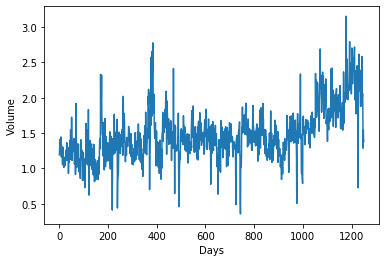

In [7]:
plt.plot(df.Volume)
plt.xlabel('Days')
plt.ylabel('Volume')

## 4.6.2 Logistic Regression

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [8]:
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
res = model.fit()
print(res.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Mon, 17 Feb 2020   Deviance:                       1727.6
Time:                                          09:41:44   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

The smallest p-value here is associated with Lag1. 

In [9]:
print("Coefficeients")
print(res.params)
print("p-Values")
print(res.pvalues)
print("Dependent variables")
print(res.model.endog_names)

Coefficeients
Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64
p-Values
Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64
Dependent variables
['Direction[Down]', 'Direction[Up]']


In [10]:
preds = res.predict()
print(preds[0:10])

[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


In [12]:
print(np.column_stack((df.as_matrix(columns = ["Direction"]).flatten(), 
                       res.model.endog)))

[['Up' 0.0]
 ['Up' 0.0]
 ['Down' 1.0]
 ...
 ['Up' 0.0]
 ['Down' 1.0]
 ['Down' 1.0]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
preds_nom = [ "Up" if x < 0.5 else "Down" for x in preds]
print(preds_nom)

['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Do

In [15]:
print(confusion_matrix(df["Direction"], 
                       preds_nom))

[[145 457]
 [141 507]]


In [16]:
print(classification_report(df["Direction"], 
                            preds_nom, 
                            digits = 3))

              precision    recall  f1-score   support

        Down      0.507     0.241     0.327       602
          Up      0.526     0.782     0.629       648

    accuracy                          0.522      1250
   macro avg      0.516     0.512     0.478      1250
weighted avg      0.517     0.522     0.483      1250



In [47]:
x_train = df[:998][:]
y_train = df[:998]['Direction']#data to 2004
x_test = df[999:][:]
y_test = df[999:]['Direction'] #data from 2005

In [46]:
model = smf.glm(formula = formula, 
                data = x_train, 
                family = sm.families.Binomial())
res = model.fit()

In [48]:
glm_fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=x_train,family=binomial)
glm_probs=predict(glm_fit,test,type="response")

SyntaxError: invalid syntax (<ipython-input-48-e8297e2aea6f>, line 1)

In [44]:
glm_probs=predict(glm_fit,test,type="response")
glm_pred=rep("Down",252)
glm_pred[glm_probs>.5]="Up"
table(glm_pred,test$Direction)
mean(glm_pred==test$Direction)

SyntaxError: invalid syntax (<ipython-input-44-acc3f2b25855>, line 4)